In [26]:
! pip install keras
! pip install scikit-learn
! pip install tensorflow

In [27]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

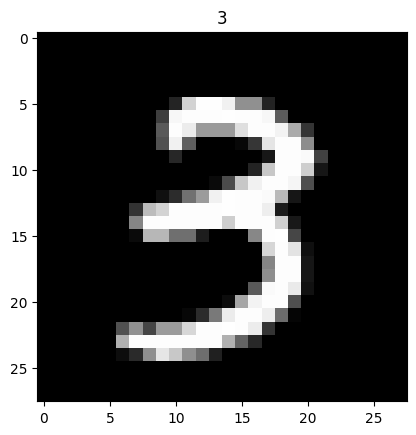

In [29]:
plt.imshow(x_train[479], cmap='gray')
plt.title(y_train[479])
plt.show()

In [30]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [31]:
### Creating Model

In [32]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

In [33]:
model = Sequential()

In [34]:
model.add(Conv2D(filters = 4, kernel_size = (5,5), activation='relu', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 4, kernel_size = (7,7), activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units = 10, activation='softmax'))

In [35]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 4)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_3 (Avera  (None, 3, 3, 4)           0         
 gePooling2D)                                                    
                                                                 
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [37]:
LABELS = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [38]:
model.fit(x_train, y_train, epochs=10, batch_size=20)

Epoch 1/10
3000/3000 [==============================] - 18s 6ms/step - loss: 0.8584 - acc: 0.7367
Epoch 2/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.2845 - acc: 0.9134
Epoch 3/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1908 - acc: 0.9420
Epoch 4/10
3000/3000 [==============================] - 18s 6ms/step - loss: 0.1382 - acc: 0.9581
Epoch 5/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1147 - acc: 0.9650
Epoch 6/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1048 - acc: 0.9676
Epoch 7/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.1018 - acc: 0.9692
Epoch 8/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0946 - acc: 0.9713
Epoch 9/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0929 - acc: 0.9709
Epoch 10/10
3000/3000 [==============================] - 17s 6ms/step - loss: 0.0893 - acc: 0.9719


In [39]:
#test = x_test[90].reshape(-1,28,28,1)
#class_probabilities = [[0.02888878, 0.3492091,  0.02651522, 0.01172278, 0.30656764, 0.0130283, 0.01346816, 0.13589846, 0.08482896, 0.0298726 ]]
#predicted_class = class_probabilities.argmax()
#predicted_class

model.predict(x_test[40].reshape(-1,28,28,1))

1/1 [==============================] - 0s 87ms/step


array([[8.2027045e-06, 9.9847680e-01, 5.0816138e-04, 4.4400978e-04,
        1.8258019e-05, 1.2513400e-06, 1.3916380e-05, 4.8255883e-04,
        4.4974793e-05, 1.9304671e-06]], dtype=float32)

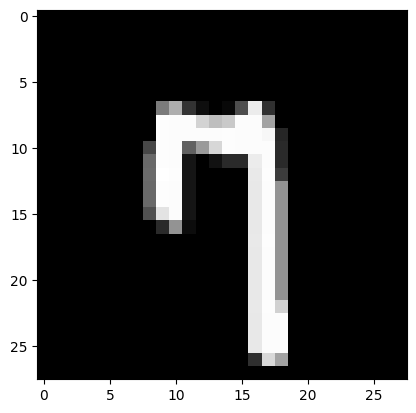

1/1 [==============================] - 0s 31ms/step


7

In [40]:
plt.imshow(x_test[80],cmap='gray')
plt.show()
model.predict(x_test[80].reshape(-1,28,28,1)).argmax()

In [41]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0731 - acc: 0.9759


[0.0730770006775856, 0.9758999943733215]

In [42]:
model.save('./model.h5')